<a href="https://colab.research.google.com/github/yoonyoung27/prac_python/blob/main/parking_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####데이터 가져오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/parking_train.csv')
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [26]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/parking_test.csv')
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

* 공가수는 비어있는 가구의 수를 뜻한다.
* 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영) 그리고 , 도보 10분거리 내 버스정류장 수 feature에 결측치가 존재한다.

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

* 자격유형, 임대보증금, 임대료 그리고 도보 10분거리 내 지하철 역 수(환승노선 수 반영) feature에 결측치가 존재한다.

In [30]:
# 임대보증금과 임대료는 '-'을 null로 바꾼 후 float로 타입 변경

import numpy as np

train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)

train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

####데이터 전처리

In [28]:
train[train.임대보증금.isnull()].공급유형.value_counts()

임대상가    562
공공분양      7
Name: 공급유형, dtype: int64

In [32]:
test[test.임대보증금.isnull()].공급유형.value_counts()

임대상가    177
영구임대      5
행복주택      4
Name: 공급유형, dtype: int64

In [33]:
train[train.임대보증금.isnull()].자격유형.value_counts()

D    569
H      8
K      4
Name: 자격유형, dtype: int64

In [34]:
test[test.임대보증금.isnull()].자격유형.value_counts()

D    180
L      4
C      2
Name: 자격유형, dtype: int64

In [35]:
train[train.자격유형.isin(['D', 'H', 'K'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 88 to 2919
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          757 non-null    object 
 1   총세대수                          757 non-null    int64  
 2   임대건물구분                        757 non-null    object 
 3   지역                            757 non-null    object 
 4   공급유형                          757 non-null    object 
 5   전용면적                          757 non-null    float64
 6   전용면적별세대수                      757 non-null    int64  
 7   공가수                           757 non-null    float64
 8   자격유형                          757 non-null    object 
 9   임대보증금                         176 non-null    float64
 10  임대료                           176 non-null    float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  623 non-null    float64
 12  도보 10분거리 내 버스정류장 수            757 non-null    float64
 13  단지내

In [36]:
test[test.자격유형.isin(['D', 'L', 'C'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 73 to 1017
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          226 non-null    object 
 1   총세대수                          226 non-null    int64  
 2   임대건물구분                        226 non-null    object 
 3   지역                            226 non-null    object 
 4   공급유형                          226 non-null    object 
 5   전용면적                          226 non-null    float64
 6   전용면적별세대수                      226 non-null    int64  
 7   공가수                           226 non-null    float64
 8   자격유형                          226 non-null    object 
 9   임대보증금                         40 non-null     float64
 10  임대료                           40 non-null     float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  201 non-null    float64
 12  도보 10분거리 내 버스정류장 수            226 non-null    float64
 13  단지내

In [37]:
# 임대보증금과 임대료가 NULL인 경우는 0으로 대체하는 것이 좋아보임
train[['임대보증금', '임대료']] = train[['임대보증금', '임대료']].fillna(0)
test[['임대보증금', '임대료']] = test[['임대보증금', '임대료']].fillna(0)

In [38]:
# NULL 값을 0으로 대체
subway_null_codes = train[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()].단지코드.unique()
train.loc[train.단지코드.isin(subway_null_codes), '도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts(dropna=False)

NaN    211
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64

In [39]:
subway_null_codes = test[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()].단지코드.unique()
test.loc[test.단지코드.isin(subway_null_codes), '도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts(dropna=False)

NaN    42
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64

In [40]:
bus_null_codes = train[train['도보 10분거리 내 버스정류장 수'].isnull()].단지코드.unique()
train.loc[train.단지코드.isin(bus_null_codes), '도보 10분거리 내 버스정류장 수'].value_counts(dropna=False)

NaN    4
Name: 도보 10분거리 내 버스정류장 수, dtype: int64

In [41]:
cols = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
train[cols] = train[cols].fillna(0)
test[cols] = test[cols].fillna(0)

In [42]:
test[test.자격유형.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


In [43]:
test[test.단지코드=='C2411'] # A로 채우면 될듯

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000.0,171480.0,0.0,2.0,840.0


In [44]:
test.loc[test.단지코드.isin(['C2411']) & test.자격유형.isnull(), '자격유형'] = 'A'

In [45]:
test[test.단지코드=='C2253'].head() # 임대보증금과 임대료가 존재하는 경우 자격유형이 C => C로 채우면 될듯

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,0.0,0.0,0.0,2.0,173.0
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,0.0,0.0,0.0,2.0,173.0


In [46]:
test.loc[test.단지코드.isin(['C2253']) & test.자격유형.isnull(), '자격유형'] = 'C'

In [47]:
# 중복 확인
train.shape, train.drop_duplicates().shape # 중복 존재

((2952, 15), (2632, 15))

In [48]:
test.shape, test.drop_duplicates().shape # 중복 존재

((1022, 14), (949, 14))

In [49]:
# 중복되는 데이터는 제거하고 분석을 진행하는 것이 좋아보임
train = train.drop_duplicates()
test = test.drop_duplicates()

In [50]:
train[train.단지코드=='C2483']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
5,C2483,900,아파트,경상북도,국민임대,51.95,89,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
6,C2483,900,아파트,경상북도,국민임대,51.95,135,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
7,C2483,900,아파트,경상북도,국민임대,59.88,86,38.0,A,30357000.0,214270.0,0.0,3.0,1425.0,1015.0


In [51]:
print(f"단지코드 C2483에서 유일한 값을 가지는 변수들:\n{list(train.columns[train[train.단지코드=='C2483'].nunique()==1])}")

단지코드 C2483에서 유일한 값을 가지는 변수들:
['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '공가수', '자격유형', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']


In [52]:
train.groupby(['단지코드']).nunique(dropna=False)

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,,,,,,,,
C1000,1,1,1,1,5,6,1,1,3,3,1,1,1,1
C1004,1,2,1,2,15,3,1,2,3,3,1,1,1,1
C1005,1,1,1,1,3,3,1,1,3,3,1,1,1,1
C1013,1,1,1,1,4,5,1,1,3,3,1,1,1,1
C1014,1,1,1,1,6,7,1,1,4,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2663,1,1,1,1,5,6,1,1,4,4,1,1,1,1
C2666,1,1,1,1,4,6,1,1,2,2,1,1,1,1
C2670,1,1,1,1,4,3,1,1,3,3,1,1,1,1


In [53]:
train.groupby(['단지코드']).nunique(dropna=False).sum(axis=0)

총세대수                             423
임대건물구분                           456
지역                               423
공급유형                             488
전용면적                            1898
전용면적별세대수                        2230
공가수                              423
자격유형                             510
임대보증금                           1277
임대료                             1289
도보 10분거리 내 지하철역 수(환승노선 수 반영)     423
도보 10분거리 내 버스정류장 수               423
단지내주차면수                          423
등록차량수                            423
dtype: int64

* 값이 423보다 크면 하나의 단지코드에 대해 둘 이상의 항목이 존재하는 것
* 임대건물구분, 공급유형, 전용면적, 전용면적별세대수, 자격유형, 임대보증금, 임대료는 하나의 단지코드에 대해 둘 이상의 항목 존재
* 단지코드별 집계시 총세대수, 지역, 공가수, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수, 단지내주차면수, 등록차량수는 그대로 사용하고, 나머지 변수들은 각 항목들을 변수로 만들어 사용하는 것이 좋아보임

####단지 별 자료 수

In [4]:
train['단지코드'].value_counts()

C1439    48
C2132    47
C1859    40
C1790    33
C2597    32
         ..
C2431     2
C2437     1
C2340     1
C2520     1
C2188     1
Name: 단지코드, Length: 423, dtype: int64

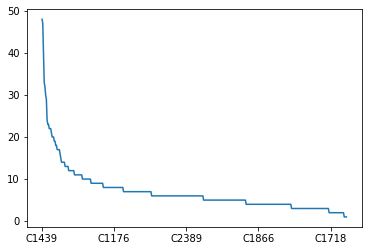

In [5]:
train['단지코드'].value_counts().plot()

In [6]:
train.set_index('단지코드', inplace=True)
train.head()

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,,,,,,,,
C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [7]:
train.loc['C1439']

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,,,,,,,,
C1439,1755,아파트,부산광역시,영구임대,26.37,1470,29.0,C,5787000,79980,1.0,3.0,270.0,172.0
C1439,1755,아파트,부산광역시,영구임대,31.32,120,29.0,C,6873000,94990,1.0,3.0,270.0,172.0
C1439,1755,아파트,부산광역시,영구임대,40.32,120,29.0,C,8848000,122290,1.0,3.0,270.0,172.0
C1439,1755,상가,부산광역시,임대상가,15.00,1,29.0,D,NaN,NaN,1.0,3.0,270.0,172.0
C1439,1755,상가,부산광역시,임대상가,15.00,1,29.0,D,NaN,NaN,1.0,3.0,270.0,172.0
C1439,1755,상가,부산광역시,임대상가,15.00,1,29.0,D,NaN,NaN,1.0,3.0,270.0,172.0
C1439,1755,상가,부산광역시,임대상가,15.00,1,29.0,D,NaN,NaN,1.0,3.0,270.0,172.0
C1439,1755,상가,부산광역시,임대상가,16.57,1,29.0,D,NaN,NaN,1.0,3.0,270.0,172.0
C1439,1755,상가,부산광역시,임대상가,16.57,1,29.0,D,NaN,NaN,1.0,3.0,270.0,172.0


* 각 단지코드별로 다양한 형태의 가구가 존재한다.

In [8]:
train.reset_index(inplace=True)

####범주형 데이터 분석

In [9]:
category_cols = ['임대건물구분', '지역', '공급유형', '자격유형']

In [10]:
for col in category_cols:
    print(col + " 카운트::")
    print(train.loc[:, col].value_counts())
    print()

임대건물구분 카운트::
아파트    2390
상가      562
Name: 임대건물구분, dtype: int64

지역 카운트::
경기도        621
경상남도       369
부산광역시      328
대전광역시      266
강원도        187
충청북도       163
충청남도       158
전라남도       151
광주광역시      141
경상북도       119
전라북도       109
대구광역시      102
제주특별자치도     91
서울특별시       64
세종특별자치시     47
울산광역시       36
Name: 지역, dtype: int64

공급유형 카운트::
국민임대         1758
임대상가          562
행복주택          213
공공임대(10년)     205
영구임대          152
공공임대(50년)      31
공공임대(분납)       12
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

자격유형 카운트::
A    1801
D     569
H     155
J     114
C      95
I      49
E      37
L      33
K      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64



(2, 2)
(4,)


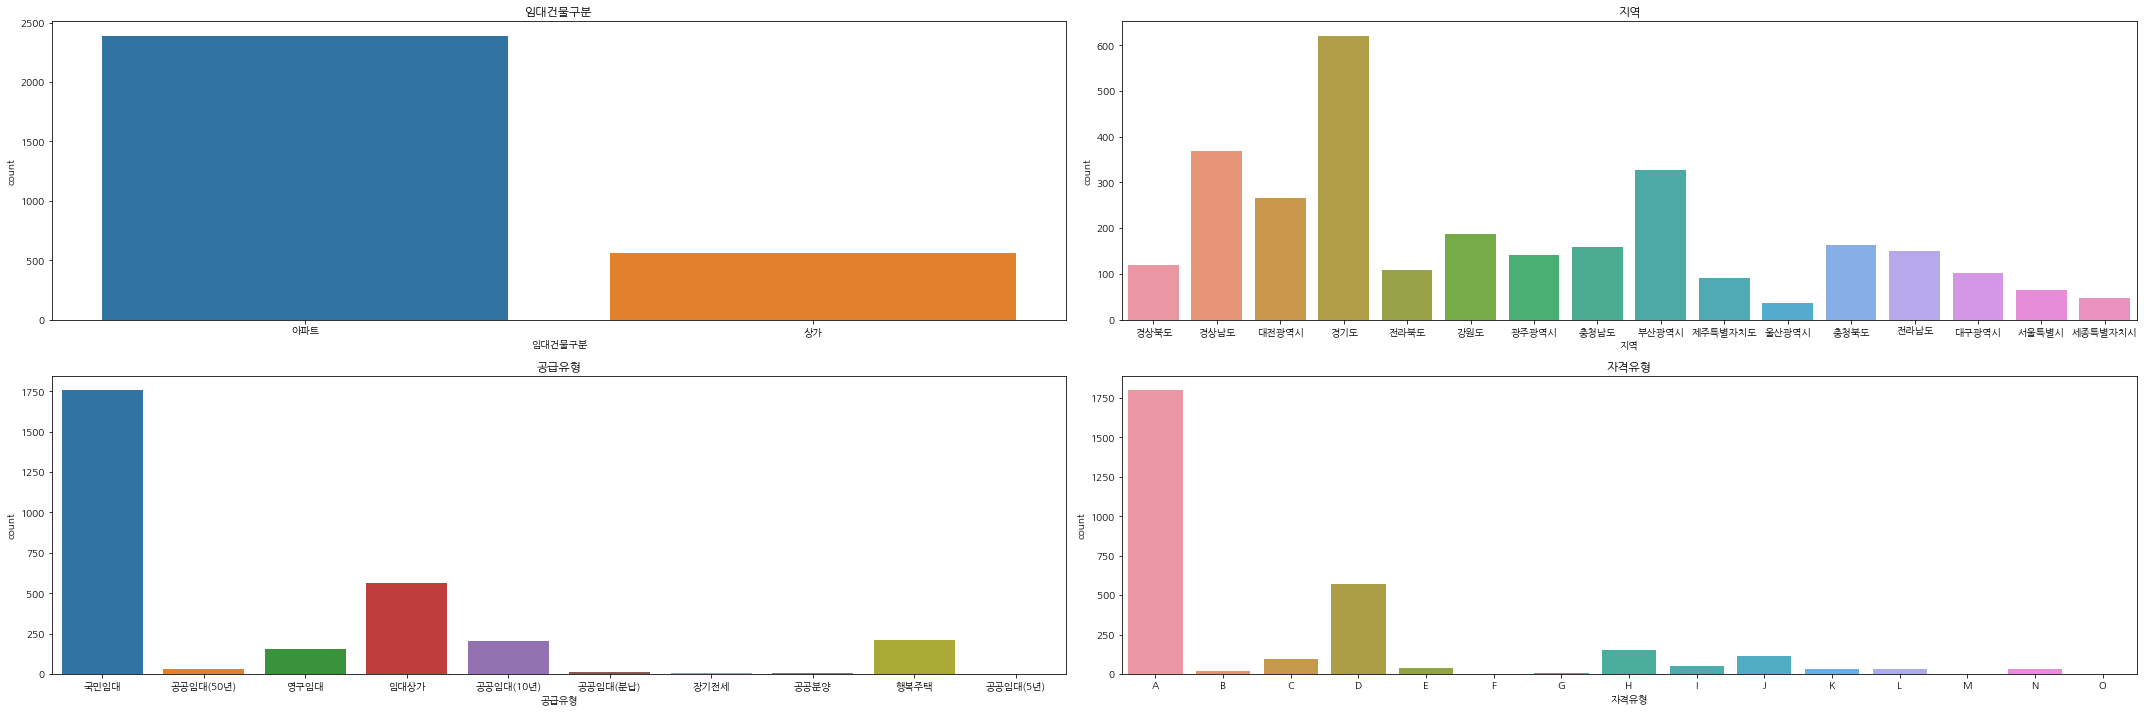

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

!apt-get update -qq
!apt-get install fonts-nanum* -qq

fm._rebuild()  # 런타임 다시 시작 이후 한글 폰트 적용 가능

plt.rc('font', family='NanumGothic')
figure, ax_list_list = plt.subplots(nrows=2, ncols=2);
figure.set_size_inches(30,10)

ax_list = ax_list_list.reshape(4)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=train, x=col, ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()

(2, 2)
(4,)


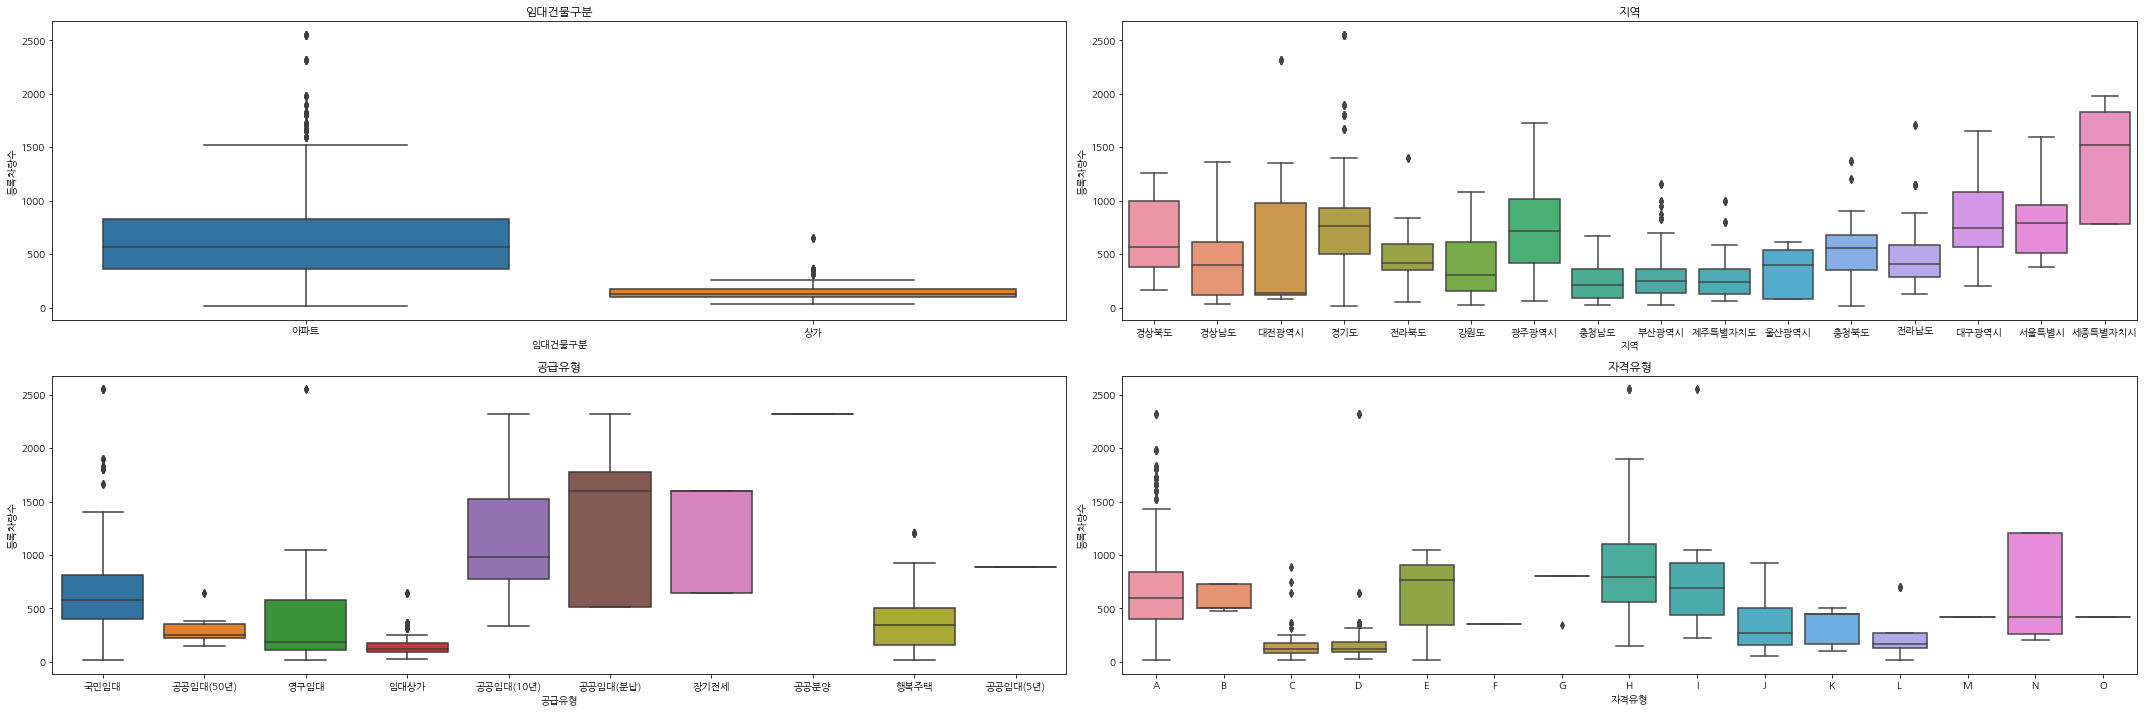

In [12]:
figure, ax_list_list = plt.subplots(nrows=2, ncols=2);
figure.set_size_inches(30,10)

ax_list = ax_list_list.reshape(4)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.boxplot(data=train, x=col, y='등록차량수', ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()

####연속형 데이터 분석

In [13]:
numerical_cols = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수']

(3, 3)
(9,)


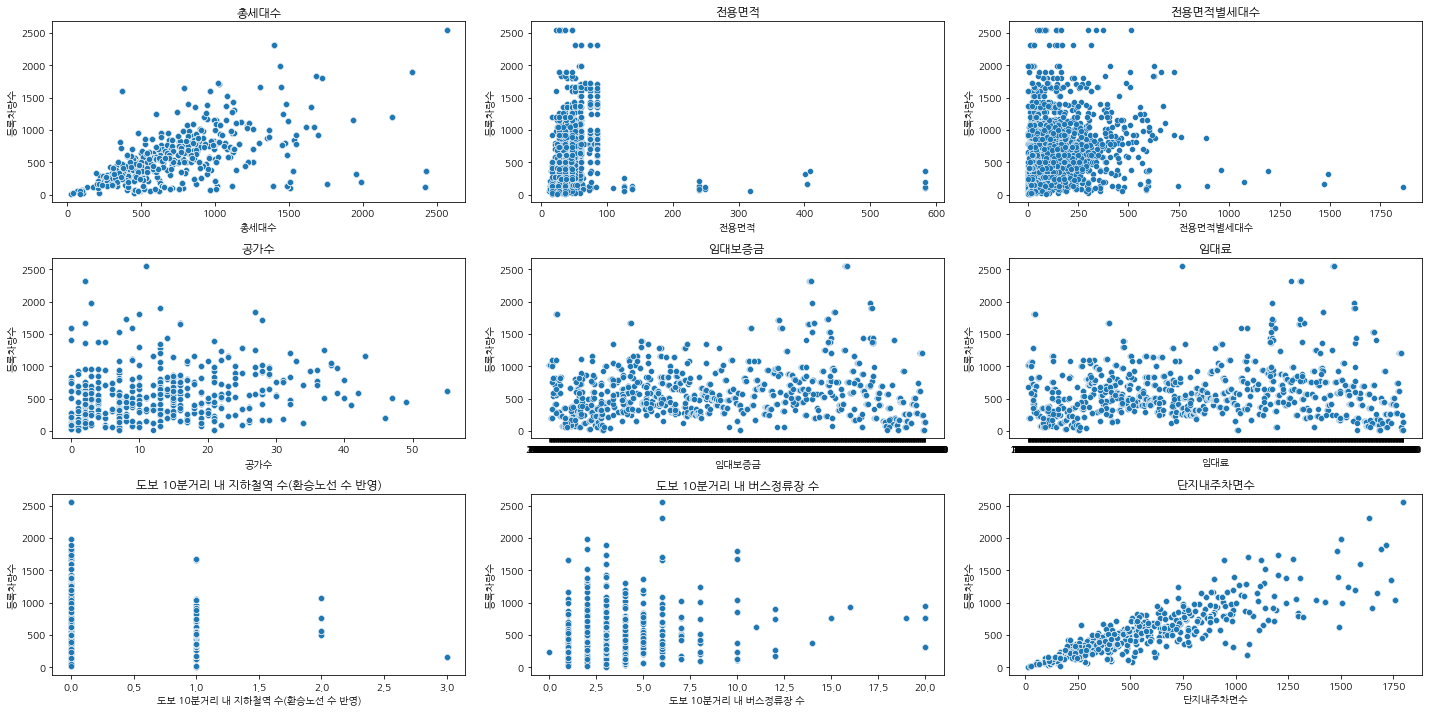

In [21]:
figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(20,10)

ax_list = ax_list_list.reshape(9)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(numerical_cols)):
    col = numerical_cols[i]
    sns.scatterplot(data=train, x=col, y='등록차량수', ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()

* 총세대수와 단지내주차면수가 명확한 상관관계를 보인다.

(3, 3)
(9,)


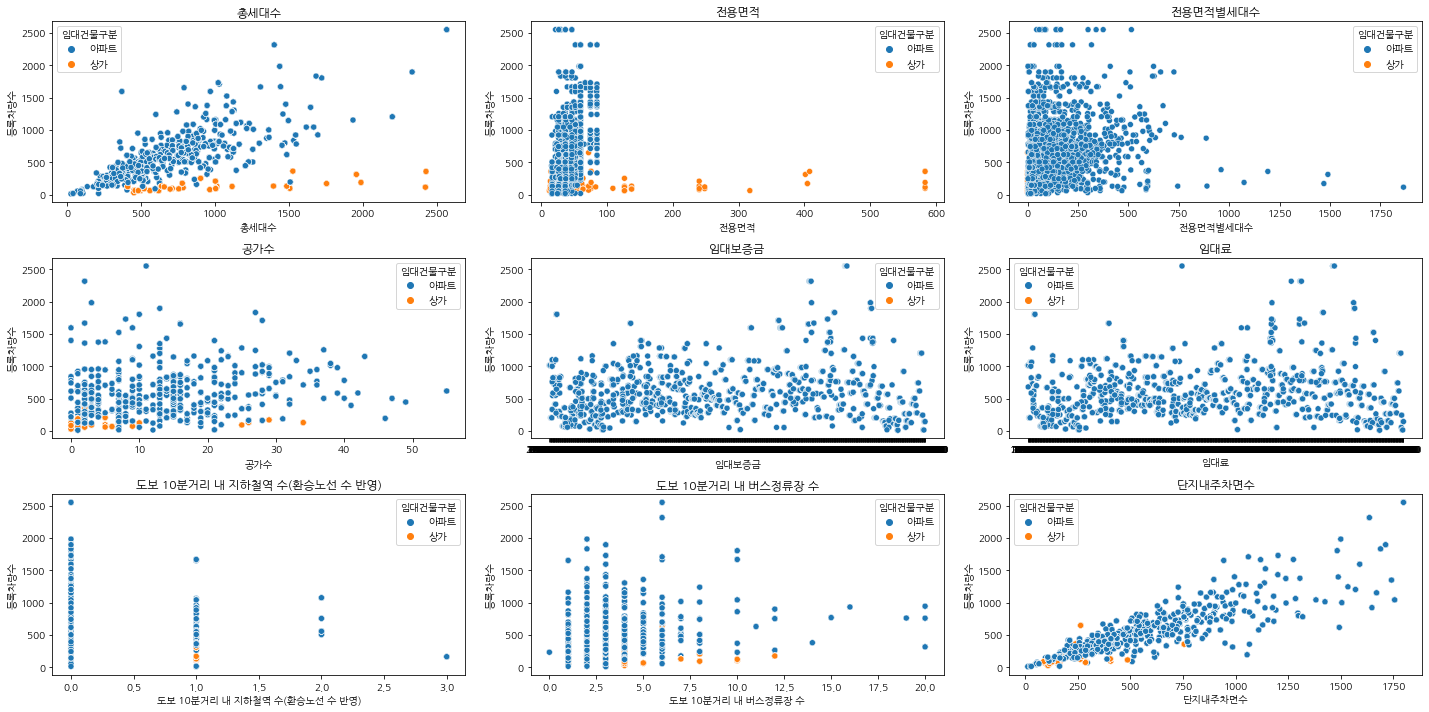

In [22]:
figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(20,10)

ax_list = ax_list_list.reshape(9)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(numerical_cols)):
    col = numerical_cols[i]
    sns.scatterplot(data=train, x=col, y='등록차량수', hue='임대건물구분', ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()

(3, 3)
(9,)


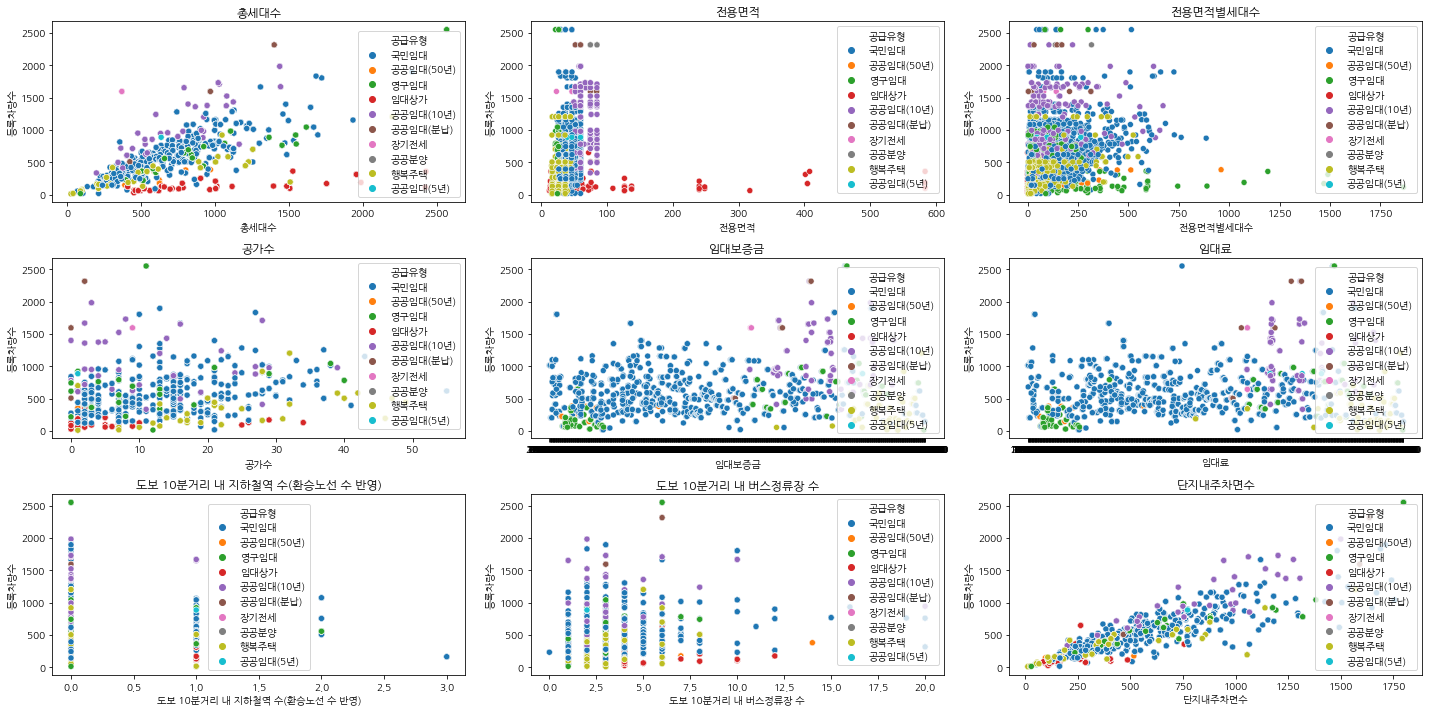

In [24]:
figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(20,10)

ax_list = ax_list_list.reshape(9)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(numerical_cols)):
    col = numerical_cols[i]
    sns.scatterplot(data=train, x=col, y='등록차량수', hue='공급유형', ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()

(3, 3)
(9,)


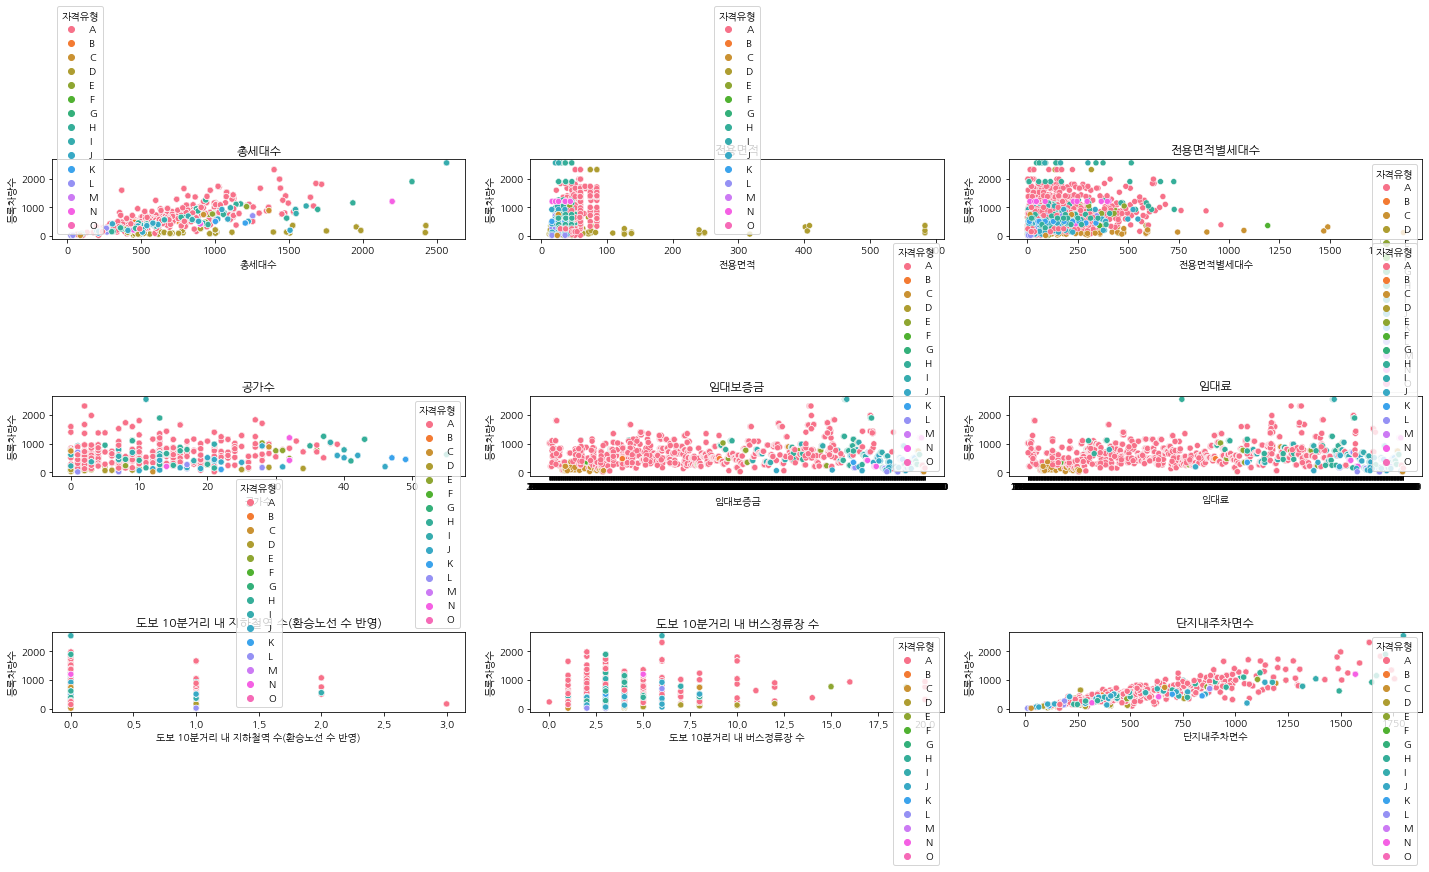

In [25]:
figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(20,10)

ax_list = ax_list_list.reshape(9)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(numerical_cols)):
    col = numerical_cols[i]
    sns.scatterplot(data=train, x=col, y='등록차량수', hue='자격유형', ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()